In [83]:
#!pip uninstall stream2 -y
#!pip install git+https://github.com/pinellolab/STREAM2.git
# Restart the kernel
import stream2 as st2
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt
#!pip3 install leidenalg

In [84]:
adata = sc.read("Matrix/data_p2_inter.h5ad")

In [85]:
adata
print(adata.obs.columns)


Index(['orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ADT',
       'nFeature_ADT', 'timepoint', 'doublet_finder', 'percent.mt', 'qc_pass',
       'RNA_snn_res.0.1', 'seurat_clusters', 'RNA.weight', 'ADT.weight',
       'wsnn_res.0.1', 'SingleR', 'predicted.celltype.l1.score',
       'predicted.celltype.l1', 'predicted.celltype.l2.score',
       'predicted.celltype.l2', 'predicted.celltype.l3.score',
       'predicted.celltype.l3', 'mapping.score', 'manual_annotation',
       'final_annot', 'bridge_annot'],
      dtype='object')


In [86]:
workdir = 'Plots'
st2.settings.set_workdir(workdir)

Saving results in: Plots


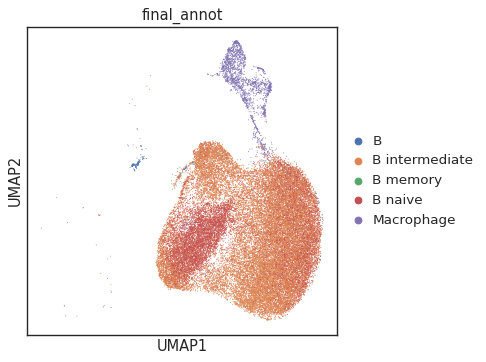

In [87]:
sc.pl.umap(adata,color=['final_annot'])

Found 1 components


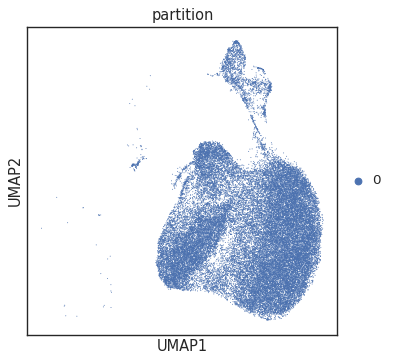

In [88]:
sc.pp.neighbors(adata,use_rep='X_umap')
sc.tl.leiden(adata)
st2.tl.find_disconnected_components(adata,groups='leiden')
sc.pl.umap(adata,color='partition')

<Axes: xlabel='partition'>

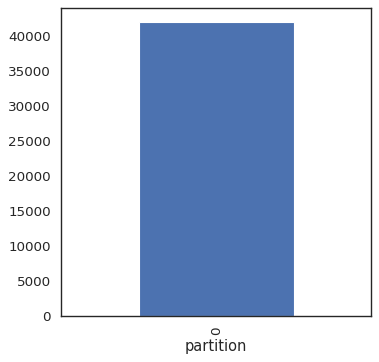

In [89]:
# Many are small clusters which are not adequate for trajectory inference and can be filtered out
# We keep components with more than 500 cells
adata.obs['partition'].value_counts().plot.bar()

Seeding initial graph for each partition...


/home/a.blanc-boekholt/miniconda3/lib/python3.13/site-packages/stream2/plotting/_plot.py:1110: FutureWarning: Use obs (e.g. `k in adata.obs` or `str(adata.obs.columns.tolist())`) instead of AnnData.obs_keys, AnnData.obs_keys is deprecated and will be removed in the future.
  if ann in adata.obs_keys():


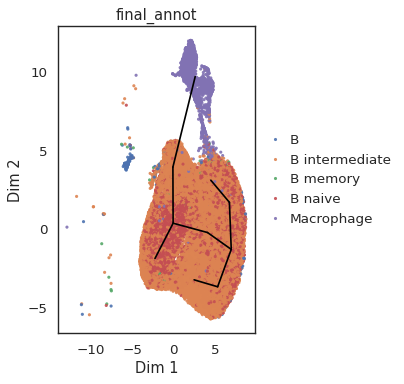

In [90]:
st2.tl.seed_graph(adata,obsm='X_umap',use_partition=True)
st2.pl.graph(adata,key='seed_epg',color=['final_annot'])

Learning elastic principal graph for each partition...


/home/a.blanc-boekholt/miniconda3/lib/python3.13/site-packages/stream2/plotting/_plot.py:1110: FutureWarning: Use obs (e.g. `k in adata.obs` or `str(adata.obs.columns.tolist())`) instead of AnnData.obs_keys, AnnData.obs_keys is deprecated and will be removed in the future.
  if ann in adata.obs_keys():


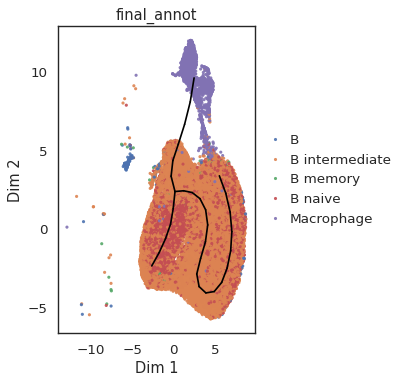

In [91]:
st2.tl.learn_graph(adata,obsm='X_umap', n_nodes=30,use_partition=True)
st2.pl.graph(adata,key='epg',color=['final_annot'])

/home/a.blanc-boekholt/miniconda3/lib/python3.13/site-packages/stream2/plotting/_plot.py:1110: FutureWarning: Use obs (e.g. `k in adata.obs` or `str(adata.obs.columns.tolist())`) instead of AnnData.obs_keys, AnnData.obs_keys is deprecated and will be removed in the future.
  if ann in adata.obs_keys():


Seeding initial graph for each partition...
Learning elastic principal graph for each partition...


/home/a.blanc-boekholt/miniconda3/lib/python3.13/site-packages/stream2/plotting/_plot.py:1110: FutureWarning: Use obs (e.g. `k in adata.obs` or `str(adata.obs.columns.tolist())`) instead of AnnData.obs_keys, AnnData.obs_keys is deprecated and will be removed in the future.
  if ann in adata.obs_keys():
/home/a.blanc-boekholt/miniconda3/lib/python3.13/site-packages/stream2/plotting/_plot.py:1110: FutureWarning: Use obs (e.g. `k in adata.obs` or `str(adata.obs.columns.tolist())`) instead of AnnData.obs_keys, AnnData.obs_keys is deprecated and will be removed in the future.
  if ann in adata.obs_keys():


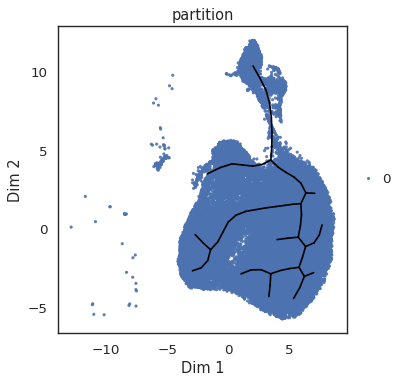

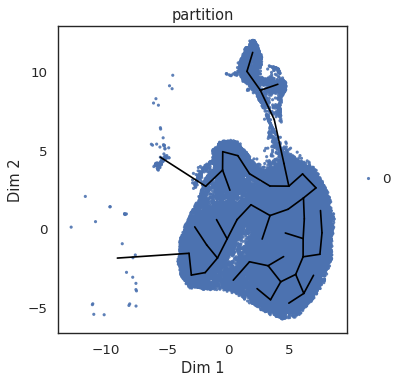

In [94]:
st2.pl.graph(adata,key='epg',color=['partition'])
use_partition=['0','1']
st2.tl.seed_graph(adata, obsm='X_umap', n_clusters=50,use_partition=use_partition)
st2.tl.learn_graph(adata, obsm='X_umap', n_nodes=60,epg_alpha=0.01,epg_mu=0.05,use_partition=use_partition)
st2.pl.graph(adata,key='seed_epg',color=['partition'])
st2.pl.graph(adata,key='epg',color=['bridge_annot'],fig_size=(15,10),save_fig=True,fig_path='Plots/',fig_name='stream2_p2.pdf')

In [93]:
sadata = st2.tl.get_component(adata,'1')
st2.tl._elpigraph._store_graph_attributes(sadata,sadata.obsm['X_umap'],'epg')
st2.pl.graph(sadata,key='epg',color=['final_annot'],show_text=True)

ValueError: zero-size array to reduction operation minimum which has no identity

In [ ]:
st2.pl.dimension_reduction?

/home/a.blanc-boekholt/miniconda3/lib/python3.13/site-packages/stream2/plotting/_plot.py:940: FutureWarning: Use obs (e.g. `k in adata.obs` or `str(adata.obs.columns.tolist())`) instead of AnnData.obs_keys, AnnData.obs_keys is deprecated and will be removed in the future.
  if ann in adata.obs_keys():


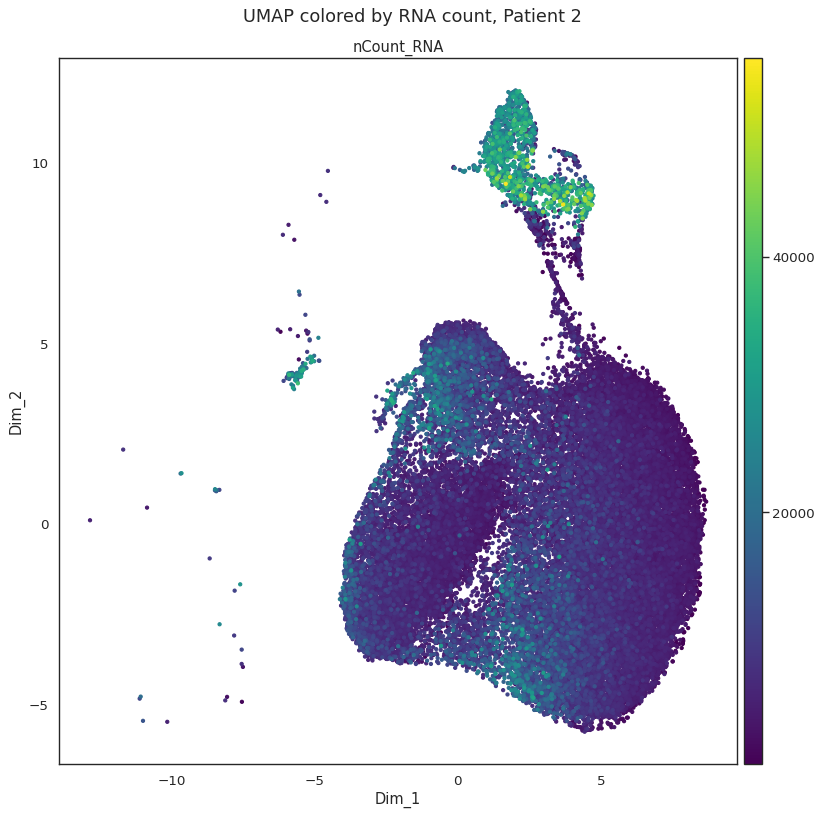

In [95]:
adata.obsm['X_dr'] = adata.obsm['X_umap']
st2.settings.set_figure_params(dpi=80,
                              style='white',
                              fig_size=[5,5],
                              rc={'image.cmap': 'viridis'})

st2.pl.dimension_reduction(adata,color=['nCount_RNA'],
                           fig_legend_ncol=2, fig_size=(10,10))
plt.suptitle("UMAP colored by RNA count, Patient 2", fontsize=16, y=1.02)
plt.savefig("Plots/p2count.png", dpi=300, bbox_inches='tight')

In [96]:
st2.tl.seed_graph(adata, obsm='X_dr', n_clusters=15)
st2.tl.learn_graph(adata, obsm='X_dr', n_nodes=20, method='principal_tree',)

Seeding initial graph...
Clustering...
K-Means clustering ...
Calculating minimum spanning tree...


/home/a.blanc-boekholt/miniconda3/lib/python3.13/site-packages/stream2/plotting/_plot.py:1434: FutureWarning: Use obs (e.g. `k in adata.obs` or `str(adata.obs.columns.tolist())`) instead of AnnData.obs_keys, AnnData.obs_keys is deprecated and will be removed in the future.
  if ann in adata.obs_keys():
/home/a.blanc-boekholt/miniconda3/lib/python3.13/site-packages/stream2/plotting/_utils_stream.py:370: FutureWarning: Use uns (e.g. `k in adata.uns` or `sorted(adata.uns)`) instead of AnnData.uns_keys, AnnData.uns_keys is deprecated and will be removed in the future.
  if 'stream_tree' not in adata.uns_keys():
/home/a.blanc-boekholt/miniconda3/lib/python3.13/site-packages/stream2/plotting/_utils_stream.py:399: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update t

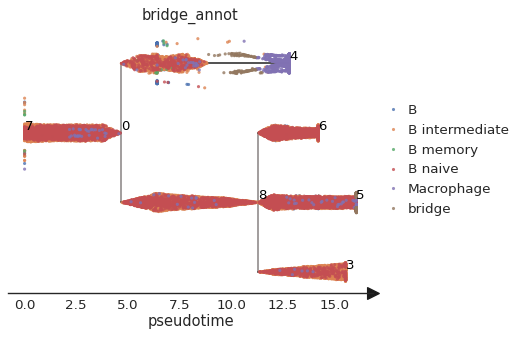

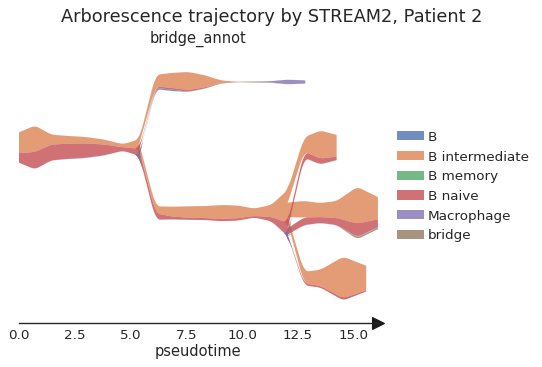

In [98]:
st2.pl.stream_sc(adata, source=7, 
                 dist_scale=0.2, 
                 color=['bridge_annot'],
                 fig_ncol=2,
                 fig_legend_ncol=1,
                 save_fig=False)
st2.pl.stream(adata, source=7, 
                 dist_scale=0.8, 
                 color=['bridge_annot'],
                 fig_legend_ncol=1)
plt.suptitle("Arborescence trajectory by STREAM2, Patient 2", fontsize=16, y=1.02)
plt.savefig("Plots/stream2_p2_arbo.png", dpi=300, bbox_inches='tight')

In [ ]:
st2.pl.stream_sc(adata, source=9, color=['final_annot'], fig_legend_ncol=1,save_fig=False)
st2.pl.stream(adata, source=9, 
              color=['final_annot'],
              fig_legend_ncol=1)
plt.suptitle("Arborescence trajectory by STREAM2, Patient 2", fontsize=16, y=1.02)
plt.savefig("Plots/stream2_p2_arbobis.png", dpi=300, bbox_inches='tight')
#adata.obsm['X_dr'] = adata.obsm['X_umap']

In [ ]:
st2.pl.stream?